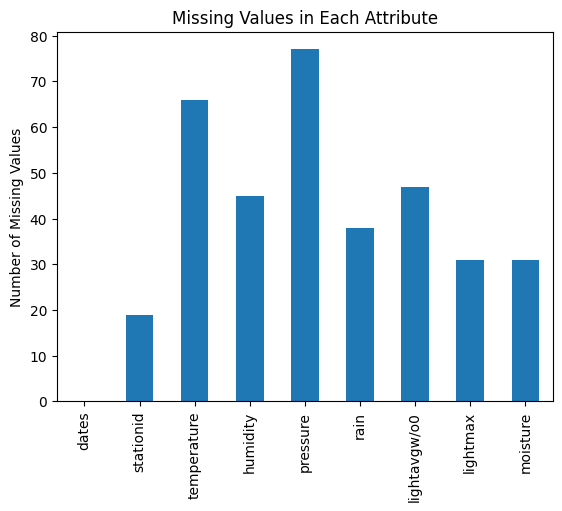

19 tuples deleted in step 2a
30 tuples deleted in step 2b
Missing values after deletion in each attribute:
dates            0
stationid        0
temperature     37
humidity        16
pressure        45
rain             7
lightavgw/o0    17
lightmax         2
moisture         7
dtype: int64
Total missing values after deletion: 131
Filled Data Statistics:
Means: temperature        21.078545
humidity           83.261665
pressure         1009.225238
rain            10942.726307
lightavgw/o0     4430.927906
lightmax        21650.163020
moisture           32.671968
dtype: float64
Medians: temperature       21.800000
humidity          90.119050
pressure        1014.070741
rain              24.750000
lightavgw/o0    1911.233800
lightmax        7544.000000
moisture          17.723400
dtype: float64
Modes: temperature       21.078545
humidity          99.000000
pressure        1009.225238
rain               0.000000
lightavgw/o0    4488.910300
lightmax        4000.000000
moisture           0.000

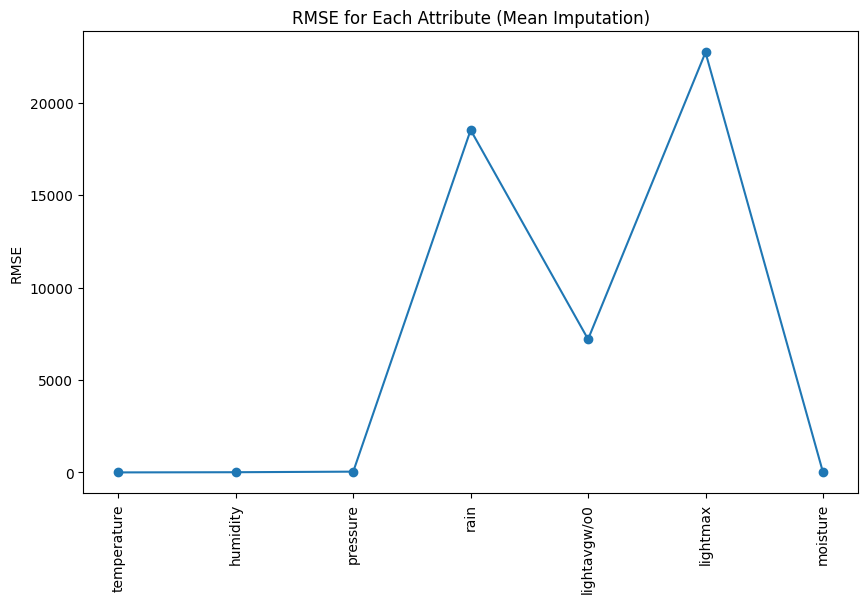

Interpolated Data Statistics:
Means: temperature        21.196222
humidity           83.538245
pressure         1009.264758
rain            10651.638370
lightavgw/o0     4486.340772
lightmax        21517.191005
moisture           32.327431
dtype: float64
Medians: temperature       22.169210
humidity          91.380950
pressure        1014.677832
rain              22.500000
lightavgw/o0    1623.494100
lightmax        6569.000000
moisture          16.306600
dtype: float64
Modes: temperature       12.727270
humidity          99.000000
pressure         789.392692
rain               0.000000
lightavgw/o0    4488.910300
lightmax        4000.000000
moisture           0.000000
Name: 0, dtype: float64
Standard Deviations: temperature         4.329504
humidity           18.206727
pressure           45.998792
rain            24779.512082
lightavgw/o0     7573.795424
lightmax        21935.165741
moisture           33.602566
dtype: float64

Original Data Statistics:
Means: temperature        21.214

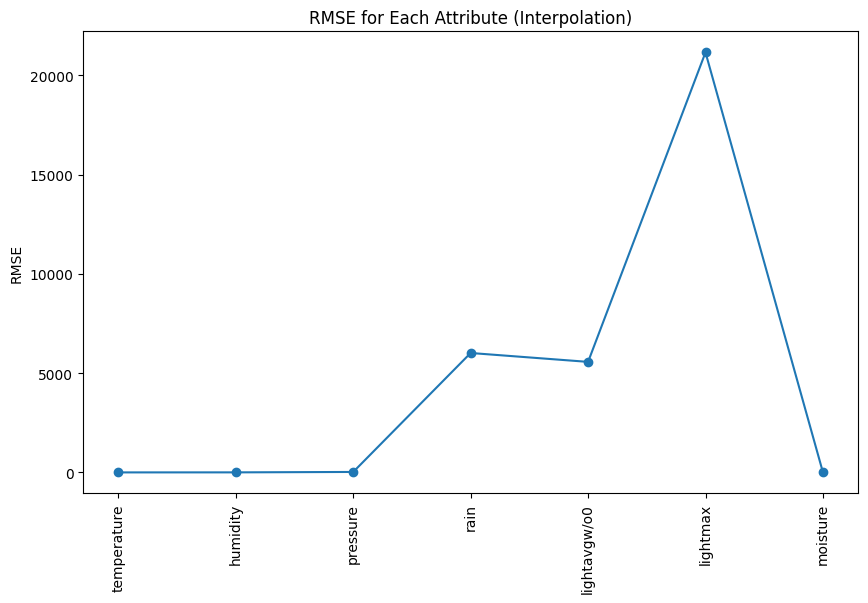

Outliers in temperature:           dates stationid  temperature  humidity     pressure  rain  \
509  16-11-2018       t15       7.6729   67.8972  1022.555421   0.0   
510  17-11-2018       t15       7.6729   67.8972  1020.869643   0.0   
511  18-11-2018       t15       7.6729   67.8972  1022.956262   0.0   
512  19-11-2018       t15       7.6729   67.8972  1026.069680   0.0   
513  20-11-2018       t15       7.6729   67.8972  1026.240417   0.0   
514  21-11-2018       t15       7.6729   67.8972  1025.567290   0.0   
515  22-11-2018       t15       7.6729   67.8972  1026.253462   0.0   
516  23-11-2018       t15       7.6729   67.8972  1028.316140   0.0   
517  24-11-2018       t15       7.6729   67.8972  1025.770238   0.0   
518  25-11-2018       t15       7.6729   67.8972  1029.755156   0.0   

     lightavgw/o0  lightmax  moisture  
509      417.0392    4000.0    8.1028  
510      417.0392    4000.0    7.9286  
511      417.0392    4000.0    7.9159  
512      417.0392    4000.0    7.

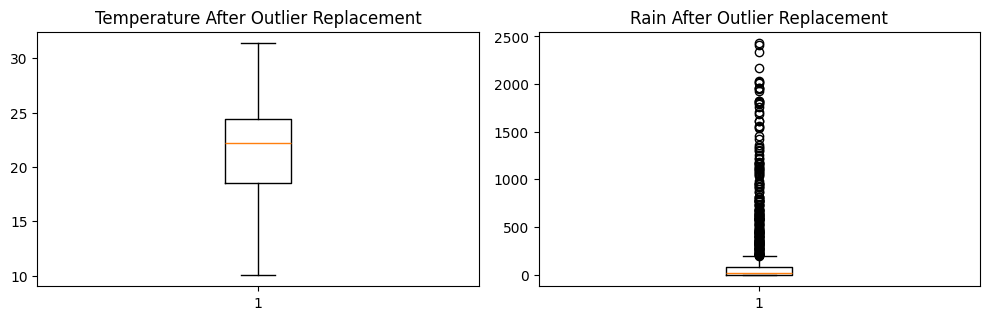

Outliers in temperature: 0
Outliers in rain: 193


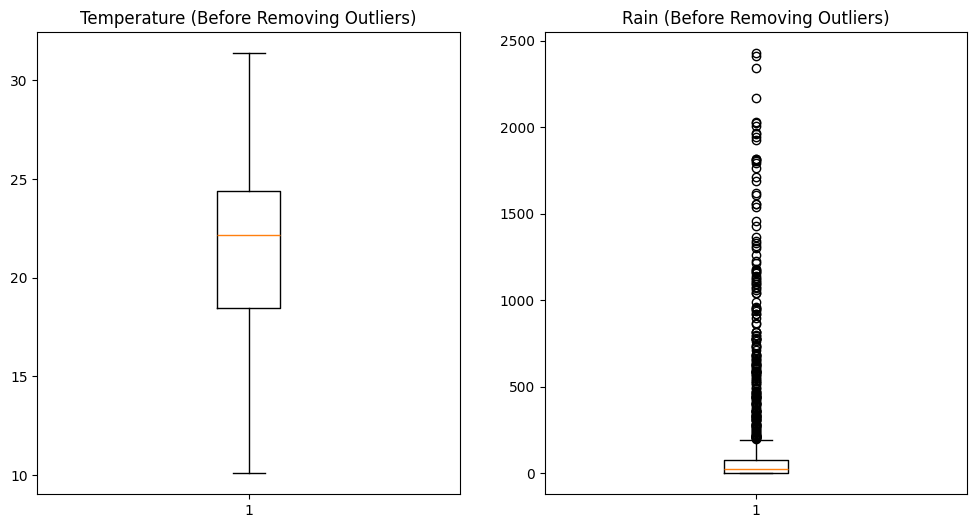

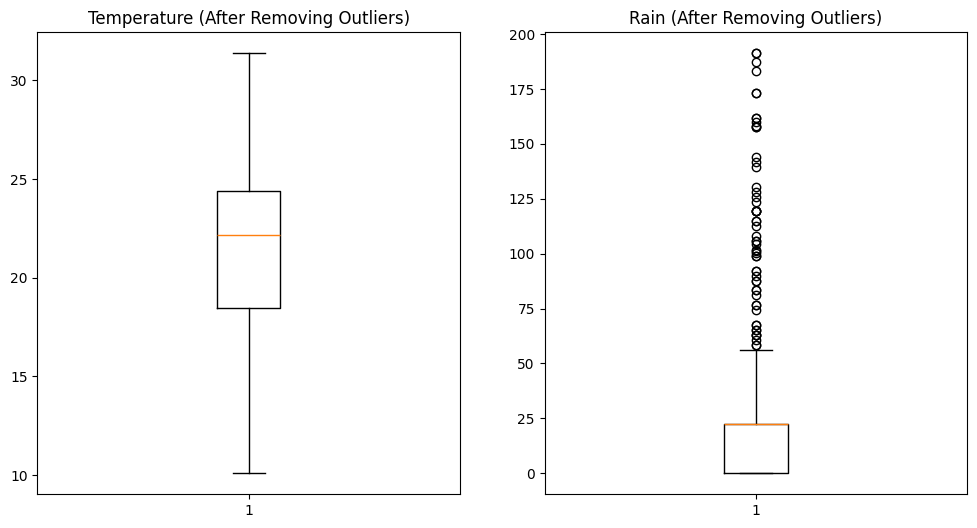

Outliers are replaced by the median of the respective attribute.


In [13]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  6 17:56:56 2022

@author: Ayush
"""

import pandas as pd
import matplotlib.pyplot as plt
import math

# 1. Plot the number of missing values in each attribute
df = pd.read_csv("landslide_data3_miss.csv")
missing_values = df.isnull().sum()
missing_values.plot.bar()
plt.ylabel("Number of Missing Values")
plt.title("Missing Values in Each Attribute")
plt.show()

# 2a. Drop rows with missing 'stationid' and print the number of deleted rows
df = pd.read_csv("landslide_data3_miss.csv")
initial_length = len(df)
df = df.dropna(subset=['stationid'])
deleted_rows_2a = initial_length - len(df)
print(f"{deleted_rows_2a} tuples deleted in step 2a")

# 2b. Drop rows with missing values in 1/3 or more attributes and print the number of deleted rows
initial_length = len(df)
threshold = math.floor(len(df.columns) / 3)
df = df.dropna(thresh=len(df.columns) - threshold)
deleted_rows_2b = initial_length - len(df)
print(f"{deleted_rows_2b} tuples deleted in step 2b")

# 3. Count and print the number of missing values in each attribute and the total
missing_values_after_deletion = df.isnull().sum()
total_missing_values = missing_values_after_deletion.sum()
print("Missing values after deletion in each attribute:")
print(missing_values_after_deletion)
print(f"Total missing values after deletion: {total_missing_values}")

# 4a. Fill missing values by mean and compare statistics with original file
df1 = pd.read_csv("landslide_data3_miss.csv")
# Calculate the mean for numeric columns only and fill missing values
numeric_cols = df1.select_dtypes(include=[np.number]).columns
df1_filled = df1.copy()
df1_filled[numeric_cols] = df1_filled[numeric_cols].fillna(df1_filled[numeric_cols].mean())

# Load the original data for comparison
ori = pd.read_csv("landslide_data3_original.csv")

# Compute statistics for filled data
means_filled = df1_filled[numeric_cols].mean()
medians_filled = df1_filled[numeric_cols].median()
modes_filled = df1_filled[numeric_cols].mode().iloc[0]
stds_filled = df1_filled[numeric_cols].std()

# Compute statistics for original data
means_ori = ori[numeric_cols].mean()
medians_ori = ori[numeric_cols].median()
modes_ori = ori[numeric_cols].mode().iloc[0]
stds_ori = ori[numeric_cols].std()

# Print the statistics
print("Filled Data Statistics:")
print("Means:", means_filled)
print("Medians:", medians_filled)
print("Modes:", modes_filled)
print("Standard Deviations:", stds_filled)

print("\nOriginal Data Statistics:")
print("Means:", means_ori)
print("Medians:", medians_ori)
print("Modes:", modes_ori)
print("Standard Deviations:", stds_ori)

# Calculate RMSE
rmse = {}
for column in numeric_cols:
    original_values = ori[column][df1[column].isnull()]
    filled_values = df1_filled[column][df1[column].isnull()]
    rmse[column] = math.sqrt(((original_values - filled_values) ** 2).mean())

print("\nRMSE:")
print(rmse)

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.plot(list(rmse.keys()), list(rmse.values()), marker='o')
plt.ylabel("RMSE")
plt.title("RMSE for Each Attribute (Mean Imputation)")
plt.xticks(rotation=90)
plt.show()

# 4b. Fill missing values using linear interpolation and compare statistics with original file
numeric_cols = df1.select_dtypes(include=[np.number]).columns
df1_interpolated = df1.copy()
df1_interpolated[numeric_cols] = df1_interpolated[numeric_cols].interpolate(method='linear')

# Load the original data for comparison
ori = pd.read_csv("landslide_data3_original.csv")

# Compute statistics for interpolated data
means_interpolated = df1_interpolated[numeric_cols].mean()
medians_interpolated = df1_interpolated[numeric_cols].median()
modes_interpolated = df1_interpolated[numeric_cols].mode().iloc[0]
stds_interpolated = df1_interpolated[numeric_cols].std()

# Compute statistics for original data
means_ori = ori[numeric_cols].mean()
medians_ori = ori[numeric_cols].median()
modes_ori = ori[numeric_cols].mode().iloc[0]
stds_ori = ori[numeric_cols].std()

# Print the statistics
print("Interpolated Data Statistics:")
print("Means:", means_interpolated)
print("Medians:", medians_interpolated)
print("Modes:", modes_interpolated)
print("Standard Deviations:", stds_interpolated)

print("\nOriginal Data Statistics:")
print("Means:", means_ori)
print("Medians:", medians_ori)
print("Modes:", modes_ori)
print("Standard Deviations:", stds_ori)

# Calculate RMSE for interpolation
rmse_interpolated = {}
for column in numeric_cols:
    original_values = ori[column][df1[column].isnull()]
    interpolated_values = df1_interpolated[column][df1[column].isnull()]
    rmse_interpolated[column] = math.sqrt(((original_values - interpolated_values) ** 2).mean())

print("\nRMSE for Interpolated Data:")
print(rmse_interpolated)

# Plot RMSE for interpolation
plt.figure(figsize=(10, 6))
plt.plot(list(rmse_interpolated.keys()), list(rmse_interpolated.values()), marker='o')
plt.ylabel("RMSE")
plt.title("RMSE for Each Attribute (Interpolation)")
plt.xticks(rotation=90)
plt.show()

# Outlier detection and handling
q1_t = df1_interpolated["temperature"].quantile(0.25)
q3_t = df1_interpolated["temperature"].quantile(0.75)
iqr_t = q3_t - q1_t
lower_bound_t = q1_t - 1.5 * iqr_t
upper_bound_t = q3_t + 1.5 * iqr_t

q1_r = df1_interpolated["rain"].quantile(0.25)
q3_r = df1_interpolated["rain"].quantile(0.75)
iqr_r = q3_r - q1_r
lower_bound_r = q1_r - 1.5 * iqr_r
upper_bound_r = q3_r + 1.5 * iqr_r

outliers_t = df1_interpolated[(df1_interpolated["temperature"] < lower_bound_t) | (df1_interpolated["temperature"] > upper_bound_t)]
outliers_r = df1_interpolated[(df1_interpolated["rain"] < lower_bound_r) | (df1_interpolated["rain"] > upper_bound_r)]

print("Outliers in temperature:", outliers_t)
print("Outliers in rain:", outliers_r)

# Replace outliers with median
df1_interpolated.loc[(df1_interpolated["temperature"] < lower_bound_t) | (df1_interpolated["temperature"] > upper_bound_t), "temperature"] = df1_interpolated["temperature"].median()
df1_interpolated.loc[(df1_interpolated["rain"] < lower_bound_r) | (df1_interpolated["rain"] > upper_bound_r), "rain"] = df1_interpolated["rain"].median()

# Boxplot before and after outlier replacement
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.boxplot(df1_interpolated["temperature"])
plt.title("Temperature After Outlier Replacement")

plt.subplot(2, 2, 2)
plt.boxplot(df1_interpolated["rain"])
plt.title("Rain After Outlier Replacement")

plt.tight_layout()
plt.show()

# 5a. Outlier detection and boxplot
q1_temp = df1_interpolated["temperature"].quantile(0.25)
q3_temp = df1_interpolated["temperature"].quantile(0.75)
iqr_temp = q3_temp - q1_temp
lower_bound_temp = q1_temp - 1.5 * iqr_temp
upper_bound_temp = q3_temp + 1.5 * iqr_temp

q1_rain = df1_interpolated["rain"].quantile(0.25)
q3_rain = df1_interpolated["rain"].quantile(0.75)
iqr_rain = q3_rain - q1_rain
lower_bound_rain = q1_rain - 1.5 * iqr_rain
upper_bound_rain = q3_rain + 1.5 * iqr_rain

outliers_temp = df1_interpolated[(df1_interpolated["temperature"] < lower_bound_temp) | (df1_interpolated["temperature"] > upper_bound_temp)]
outliers_rain = df1_interpolated[(df1_interpolated["rain"] < lower_bound_rain) | (df1_interpolated["rain"] > upper_bound_rain)]

print(f"Outliers in temperature: {len(outliers_temp)}")
print(f"Outliers in rain: {len(outliers_rain)}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df1_interpolated["temperature"])
plt.title("Temperature (Before Removing Outliers)")
plt.subplot(1, 2, 2)
plt.boxplot(df1_interpolated["rain"])
plt.title("Rain (Before Removing Outliers)")
plt.show()

# 5b. Replace outliers with median and replot boxplot
df1_interpolated.loc[(df1_interpolated["temperature"] < lower_bound_temp) | (df1_interpolated["temperature"] > upper_bound_temp), "temperature"] = df1_interpolated["temperature"].median()
df1_interpolated.loc[(df1_interpolated["rain"] < lower_bound_rain) | (df1_interpolated["rain"] > upper_bound_rain), "rain"] = df1_interpolated["rain"].median()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df1_interpolated["temperature"])
plt.title("Temperature (After Removing Outliers)")
plt.subplot(1, 2, 2)
plt.boxplot(df1_interpolated["rain"])
plt.title("Rain (After Removing Outliers)")
plt.show()

print("Outliers are replaced by the median of the respective attribute.")
